# Importing Libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

ModuleNotFoundError: No module named 'pyod'

# Dataset 

In [46]:
data = pd.read_csv('Dataset example.csv', dtype={'stop_name': 'str','daytime_routes': 'str','division':'str','line':'str','complex_id':'str'})

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset example.csv'

In [47]:
data

NameError: name 'data' is not defined

# Data Cleansing

In [48]:
# Identifying Null Values in the dataset
data.isnull()

NameError: name 'data' is not defined

In [49]:
#Total number of null values in each column.
data.isnull().sum()

NameError: name 'data' is not defined

In [50]:
# Dropping null values from dataset,dropna() drop all rows with null values.
cd = data.dropna()
cd

NameError: name 'data' is not defined

In [ ]:
#Modifying dateset by removing extra spaces and dashes.
cd.stop_name=cd.stop_name.str.replace('-','').fillna(cd.stop_name)

In [ ]:
#A new dataframe, A cleaned dataframe 
cd

In [ ]:
#Identifying the outliers in dataset.
sns.set_palette(sns.color_palette("crest"))
plt.figure(figsize=(20,4))
x = cd['entries']
y = cd['exits']
sns.relplot(data=cd, x=x, y=y, kind="scatter", hue="borough",aspect=11.7/4.27, height=4)

# Angled Based Outlier Detection ABOD

In [ ]:
abod_model = ABOD(contamination= 0.1, method='fast', n_neighbors=10)
abod_model.fit(cd[['entries','exits']])

In [ ]:
cd['entries_ABOD'] = abod_model.decision_function(cd[['entries','exits']])

In [ ]:
cd['anomaly_ABOD'] = abod_model.predict(cd[['entries','exits']])
cd

In [ ]:
cd[cd['anomaly_ABOD']==0]

In [ ]:
total_outliers = len(cd[cd['anomaly_ABOD']!=0])

In [ ]:
total_outliers

In [ ]:
total_inliers = len(cd[cd['anomaly_ABOD']==0])

In [ ]:
total_inliers

In [ ]:
plt.title("Angle Based Outlier Detection")
sns.distplot(cd['anomaly_ABOD'])

# K-Nearest Neighbours KNN 

In [2]:
from pyod.models.knn import KNN

ModuleNotFoundError: No module named 'pyod'

In [3]:
knn_model = KNN(contamination = 0.1)

NameError: name 'KNN' is not defined

In [4]:
knn_model.fit(cd[['entries','exits']])

NameError: name 'knn_model' is not defined

In [5]:
cd['entries_KNN'] = knn_model.decision_function(cd[['entries','exits']])

[Errno 2] No such file or directory: '[entries_KNN] = knn_model.decision_function(cd[[entries,exits]])'
/Users/jashshah/CAPSTONE PROJECT 


In [6]:
cd['anomaly_knn'] = knn_model.predict(cd[['entries','exits']])

[Errno 2] No such file or directory: '[anomaly_knn] = knn_model.predict(cd[[entries,exits]])'
/Users/jashshah/CAPSTONE PROJECT 


In [7]:
cd

/Users/jashshah


In [8]:
total_outliers_ = len(cd[cd['anomaly_knn']==1])

NameError: name 'cd' is not defined

In [9]:
total_outliers_

NameError: name 'total_outliers_' is not defined

In [10]:
total_inliers_ = len(cd[cd['anomaly_knn']==0])

NameError: name 'cd' is not defined

In [11]:
total_inliers_

NameError: name 'total_inliers_' is not defined

NameError: name 'cd' is not defined

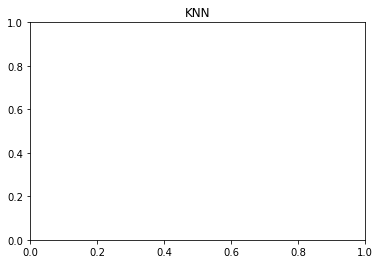

In [12]:
plt.title("KNN")
sns.distplot(cd['anomaly_knn'])

# Cluster-based Local Outlier Factor CBLOF 

In [13]:
from pyod.models.cblof import CBLOF

ModuleNotFoundError: No module named 'pyod'

In [14]:
cblof_model = CBLOF(contamination = 0.1)

NameError: name 'CBLOF' is not defined

In [15]:
cblof_model.fit(cd[['entries','exits']])

NameError: name 'cblof_model' is not defined

In [16]:
cd['Score_CBLOF'] = cblof_model.decision_function(cd[['entries','exits']])

[Errno 2] No such file or directory: '[Score_CBLOF] = cblof_model.decision_function(cd[[entries,exits]])'
/Users/jashshah


In [17]:
cd['Anomaly_CBLOF'] = cblof_model.predict(cd[['entries','exits']])

[Errno 2] No such file or directory: '[Anomaly_CBLOF] = cblof_model.predict(cd[[entries,exits]])'
/Users/jashshah


In [18]:
cd

/Users/jashshah


In [19]:
total_outliers_2 = len(cd[cd['Anomaly_CBLOF']==1])

NameError: name 'cd' is not defined

In [20]:
total_outliers_2

NameError: name 'total_outliers_2' is not defined

In [21]:
total_inliers_2 = len(cd[cd['Anomaly_CBLOF']==0])
total_inliers_2

NameError: name 'cd' is not defined

NameError: name 'cd' is not defined

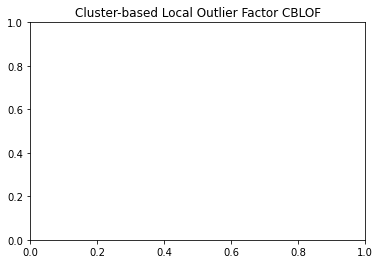

In [22]:
plt.title("Cluster-based Local Outlier Factor CBLOF")

sns.distplot(cd['Anomaly_CBLOF'])

# Isolation Forest IForest

In [23]:
from pyod.models.iforest import IForest

ModuleNotFoundError: No module named 'pyod'

In [24]:
iforest_model = IForest(contamination = 0.1)

NameError: name 'IForest' is not defined

In [25]:
iforest_model.fit(cd[['entries','exits']])

NameError: name 'iforest_model' is not defined

In [26]:
cd['Score_iForest'] = iforest_model.decision_function(cd[['entries','exits']])

[Errno 2] No such file or directory: '[Score_iForest] = iforest_model.decision_function(cd[[entries,exits]])'
/Users/jashshah


In [47]:
cd['Anomaly_iforest'] = iforest_model.predict(cd[['entries','exits']])

In [48]:
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits,entries_ABOD,anomaly_ABOD,entries_KNN,anomaly_knn,Score_CBLOF,Anomaly_CBLOF,Score_iForest,Anomaly_iforest
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0,-6.212238e-08,0,60.406953,0,3226.610659,1,-0.043494,0
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0,-6.524665e-09,0,198.297756,1,8400.806817,1,0.087359,1
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0,-3.804586e-10,0,191.783732,1,8862.628127,1,0.086011,1
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0,-1.284716e-08,0,96.607453,1,711.015917,0,0.013953,1
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0,-2.564345e-07,0,44.553339,0,2382.589777,0,-0.035793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0,-2.997675e-04,0,8.246211,0,887.468267,0,-0.145005,0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0,-3.207254e-03,0,6.082763,0,843.461752,0,-0.147763,0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0,-1.304666e-03,0,7.000000,0,899.607873,0,-0.147131,0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0,-3.981888e-04,0,8.246211,0,471.281413,0,-0.145938,0


In [49]:
total_outliers_iforest = len(cd[cd['Anomaly_iforest']==1])

In [50]:
total_outliers_iforest

15325

In [51]:
total_inliers_iforest = len(cd[cd['Anomaly_iforest']==0])

In [52]:
total_inliers_iforest

137952

<AxesSubplot:title={'center':'Isolation Forest'}, xlabel='Anomaly_iforest', ylabel='Density'>

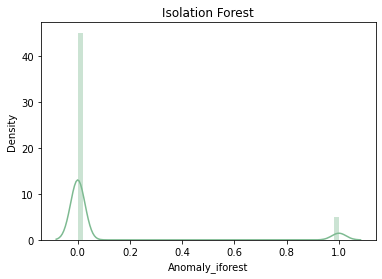

In [58]:
plt.title("Isolation Forest")
sns.distplot(cd['Anomaly_iforest'])